<a href="https://colab.research.google.com/github/DevanshD3/Clustering-Algorithms/blob/main/SpectralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import load_files
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
import numpy as np


In [ ]:

# for reproducibility
random_state = 0 

DATA_DIR = "/content/drive/MyDrive/Data/CV.csv"
df = pd.read_csv(DATA_DIR, low_memory= False)
df.head()

,Author ID,Modified Description,ID
0,27348,Simple latch with two cross-coupled NOR gates.,137750
1,47272,Laboratorio. Sesión 3.FUNDAMENTOS DE COMPUTADORES,229813
2,36805,This is a 7 segment display.,249268
3,36489,Este bloque les servirá para el examen parcial,232819
4,30771,The external clock is directly connected to al...,249264


In [ ]:
vec = TfidfVectorizer(stop_words='english')
df['Modified Description'] = df['Modified Description'].fillna('')
vec_matrix = vec.fit_transform(df['Modified Description'])
features = vec.transform(df['Modified Description'])


In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


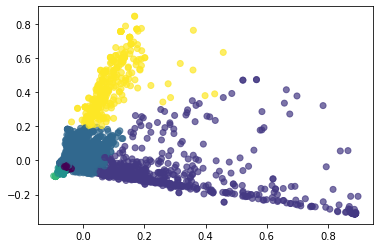

In [ ]:
sc = SpectralClustering(n_clusters=7, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(reduced_features)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=sc_clustering.labels_, alpha=0.7)
